Name: Namith Ravindranath
Student ID: 23040851

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [171]:
data = pd.read_csv('matches.csv')
data.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [239]:
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets,Season_Numeric
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529,2013.444444
std,3464.478148,0.156630,23.471144,3.387963,3.366895
min,1.000000,0.000000,0.000000,0.000000,2008.000000
25%,189.750000,0.000000,0.000000,0.000000,2011.000000
50%,378.500000,0.000000,0.000000,4.000000,2013.000000
75%,567.250000,0.000000,19.000000,6.000000,2016.000000
max,11415.000000,1.000000,146.000000,10.000000,2019.000000


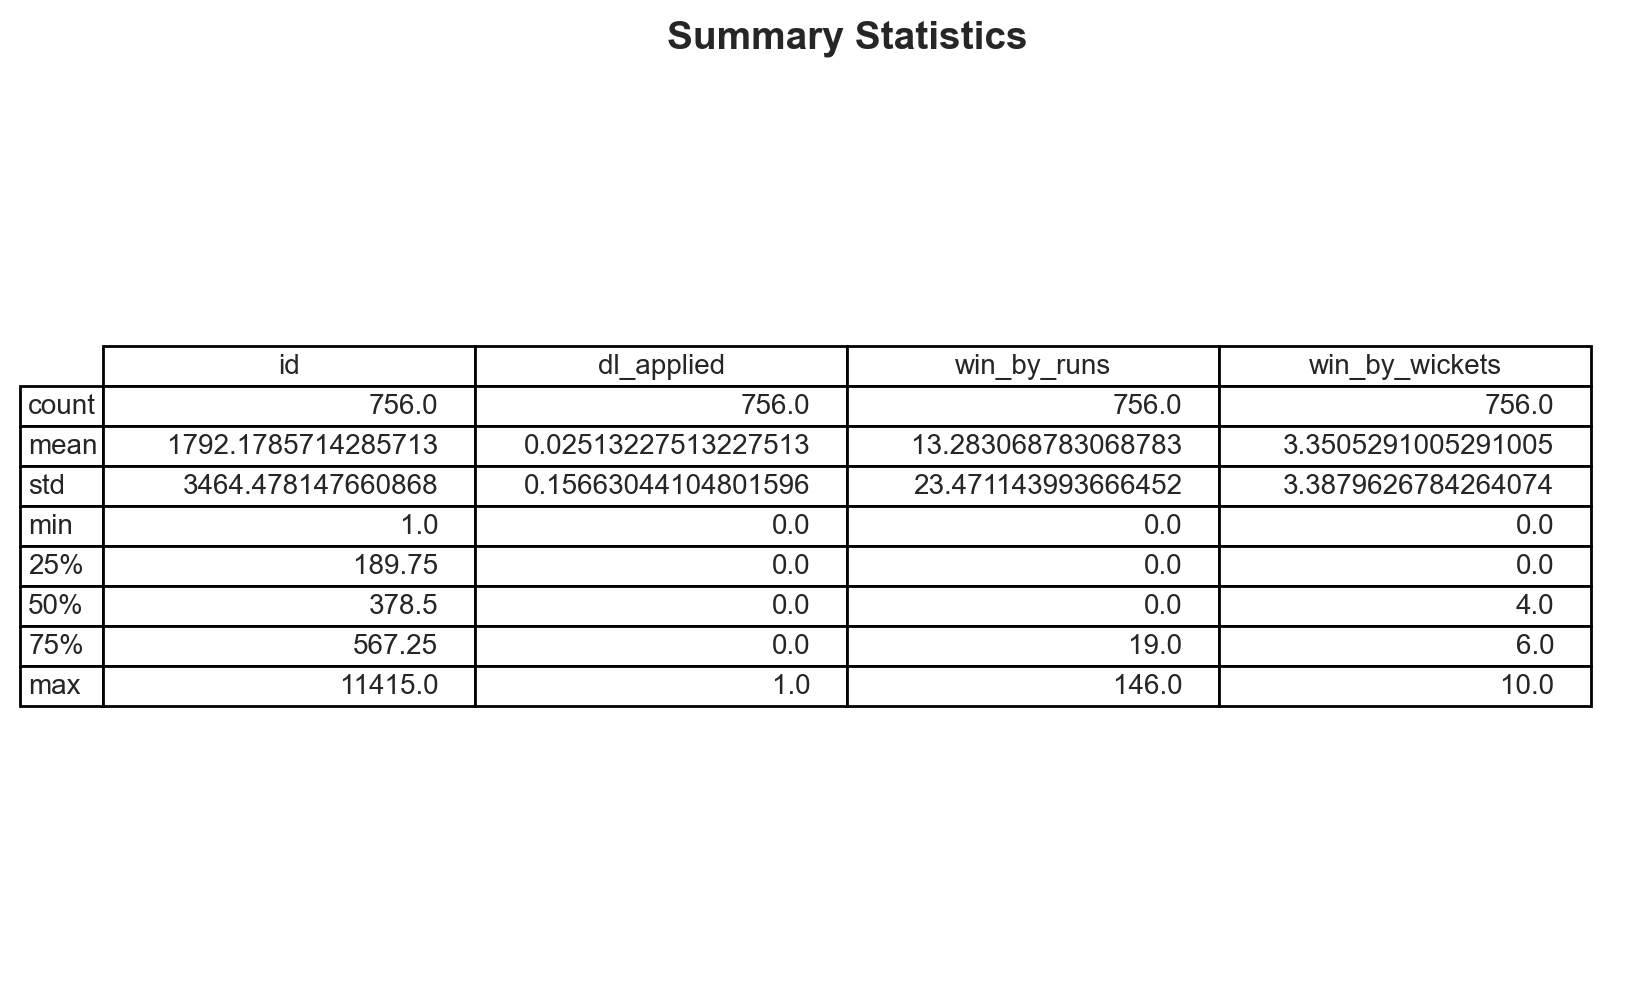

In [253]:
from pandas.plotting import table
key_columns = ['id', 'dl_applied', 'win_by_runs', 'win_by_wickets']
statistics = df[key_columns].describe()
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
ax.axis('off')
stats_table = table(ax, statistics, loc='center', colWidths=[0.2] * len(statistics.columns))
stats_table.auto_set_font_size(False)
stats_table.set_fontsize(10)  # Set font size
stats_table.scale(1.2, 1.2)  # Scale the table for better readability
plt.title("Summary Statistics", fontsize=14, fontweight='bold')
plt.savefig('summary_statistics.png', bbox_inches="tight", dpi=300)
plt.show()

In [173]:
#Checking Null Values
data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

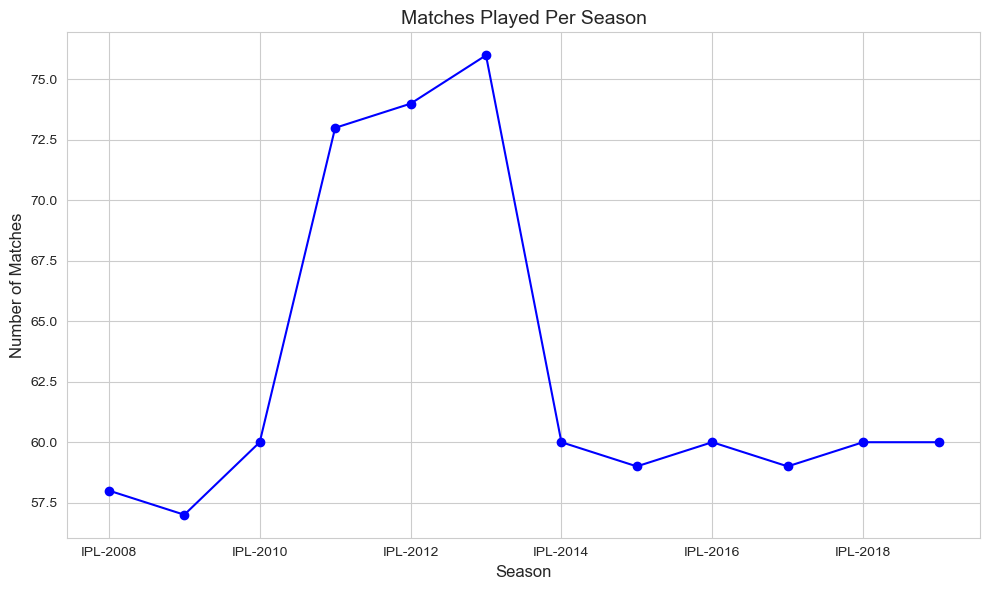

In [211]:
#Matches Played Per Season
plt.figure(figsize=(10, 6))
data['Season'].value_counts().sort_index().plot(kind='line', marker='o', color='blue')
plt.title('Matches Played Per Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

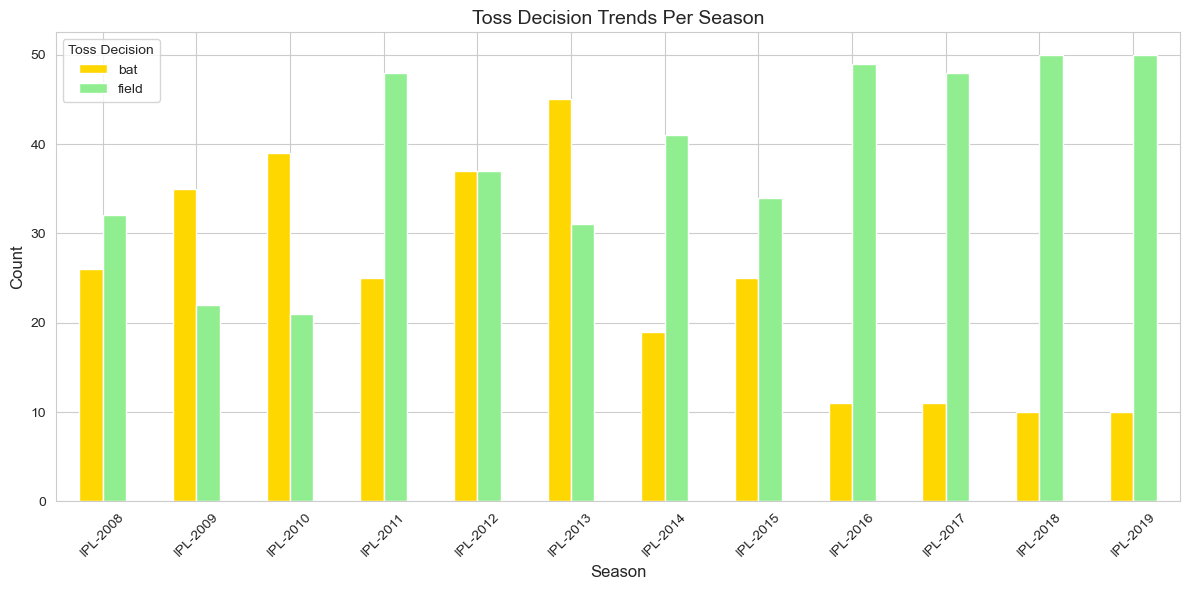

In [176]:
#Toss Decision Trends
toss_decision = data.groupby(['Season', 'toss_decision']).size().unstack()
toss_decision.plot(kind='bar', stacked=False, figsize=(12, 6), color=['gold', 'lightgreen'])
plt.title('Toss Decision Trends Per Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Toss Decision')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Runs')

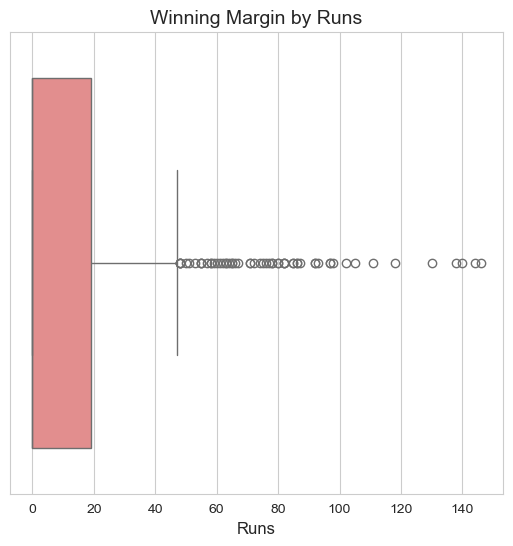

In [177]:
#Winning Margins
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='win_by_runs', color='lightcoral')
plt.title('Winning Margin by Runs', fontsize=14)
plt.xlabel('Runs', fontsize=12)

Text(0.5, 0, 'Wickets')

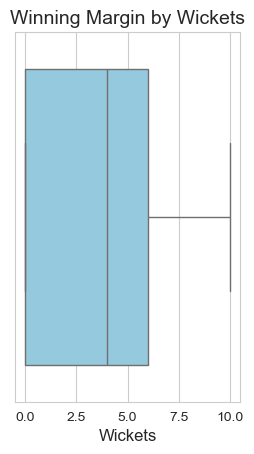

In [213]:
#Winning Margins by wickets
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='win_by_wickets', color='skyblue')
plt.title('Winning Margin by Wickets', fontsize=14)
plt.xlabel('Wickets', fontsize=12)

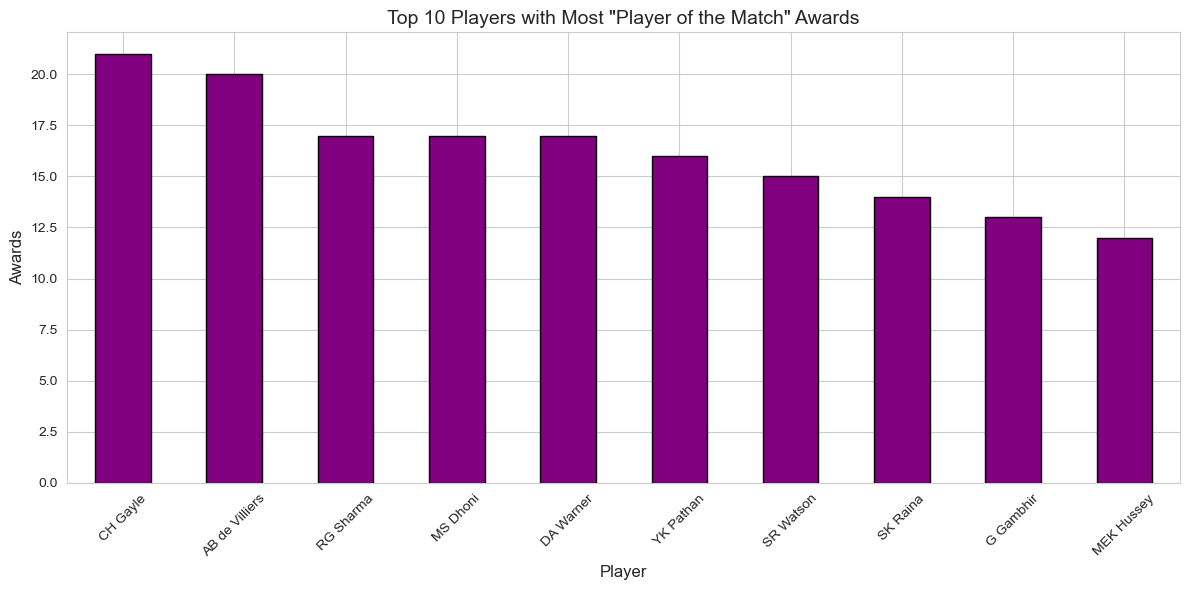

In [180]:
#Player of the Match Trends
plt.figure(figsize=(12, 6))
data['player_of_match'].value_counts().head(10).plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 10 Players with Most "Player of the Match" Awards', fontsize=14)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Awards', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

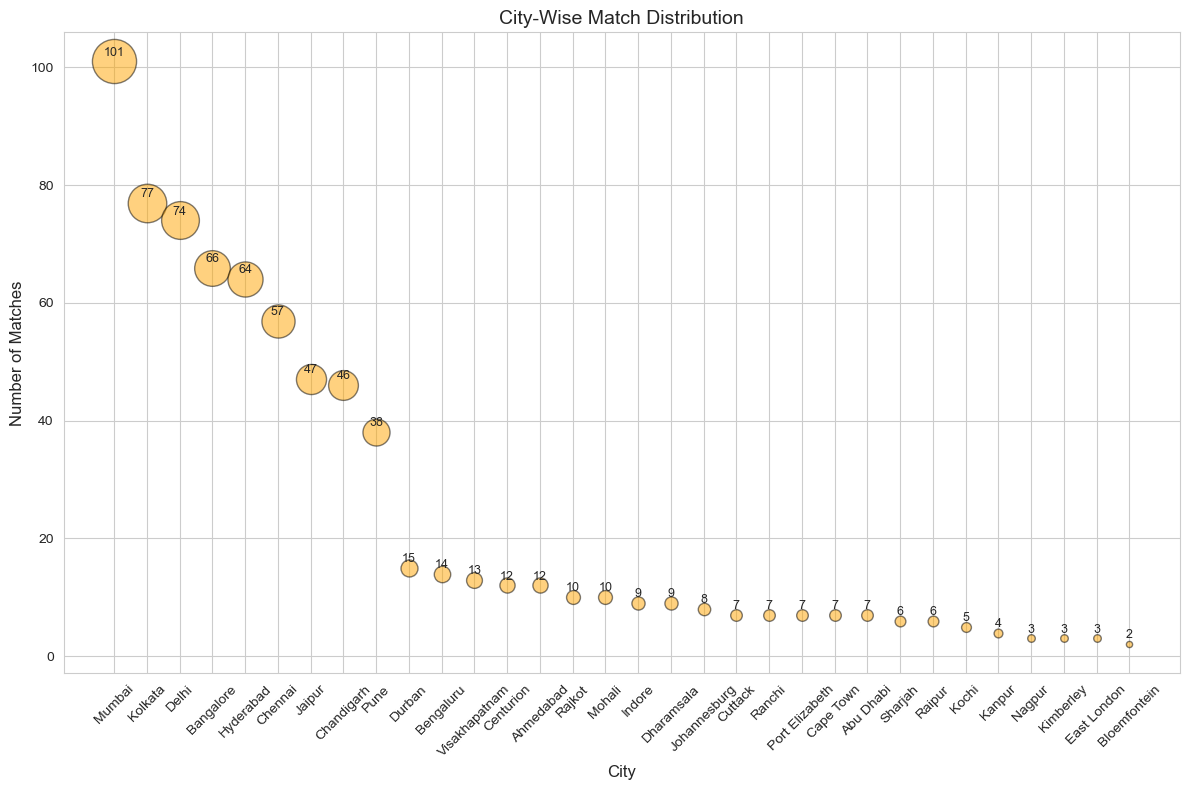

In [217]:
#City-Wise Match Distribution
city_counts = data['city'].value_counts()
plt.figure(figsize=(12, 8))
for i, city in enumerate(city_counts.index):
    plt.scatter(city, city_counts.values[i], s=city_counts.values[i] * 10, alpha=0.5, color='orange', edgecolors='black')
    plt.text(city, city_counts.values[i] + 1, str(city_counts.values[i]), fontsize=9, ha='center')
plt.title('City-Wise Match Distribution', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

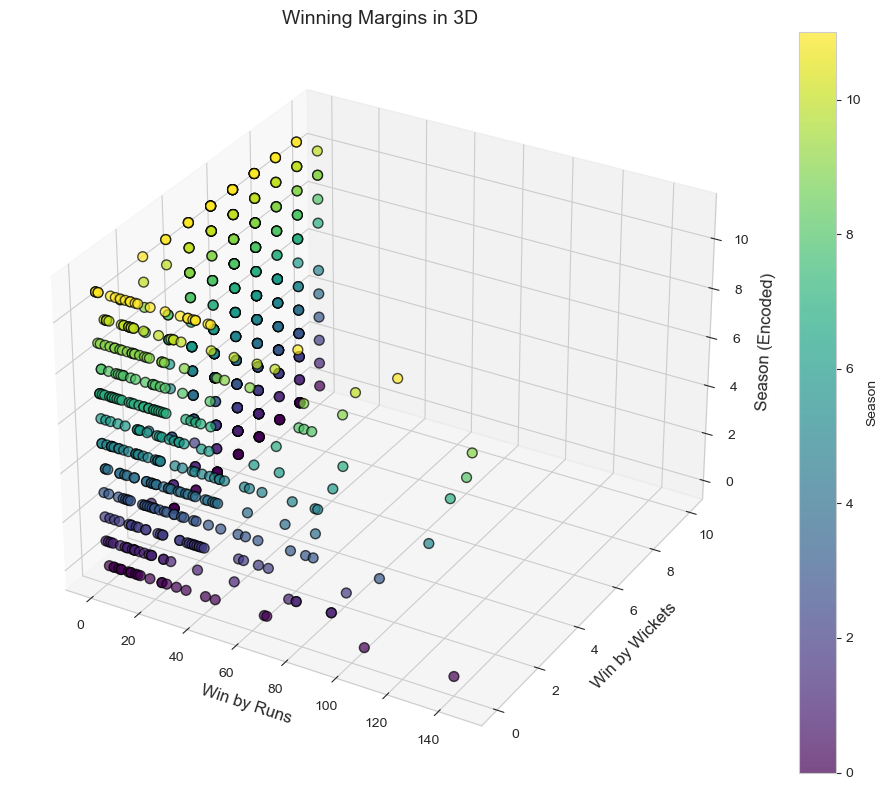

In [221]:
#Winning Margins in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Using win_by_runs, win_by_wickets, and Season (encoded as integers) for 3D plot
seasons = data['Season'].astype('category').cat.codes
sc = ax.scatter(data['win_by_runs'], data['win_by_wickets'], seasons, c=seasons, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

ax.set_title('Winning Margins in 3D', fontsize=14)
ax.set_xlabel('Win by Runs', fontsize=12)
ax.set_ylabel('Win by Wickets', fontsize=12)
ax.set_zlabel('Season (Encoded)', fontsize=12)

plt.colorbar(sc, ax=ax, label='Season')
plt.tight_layout()
plt.show()

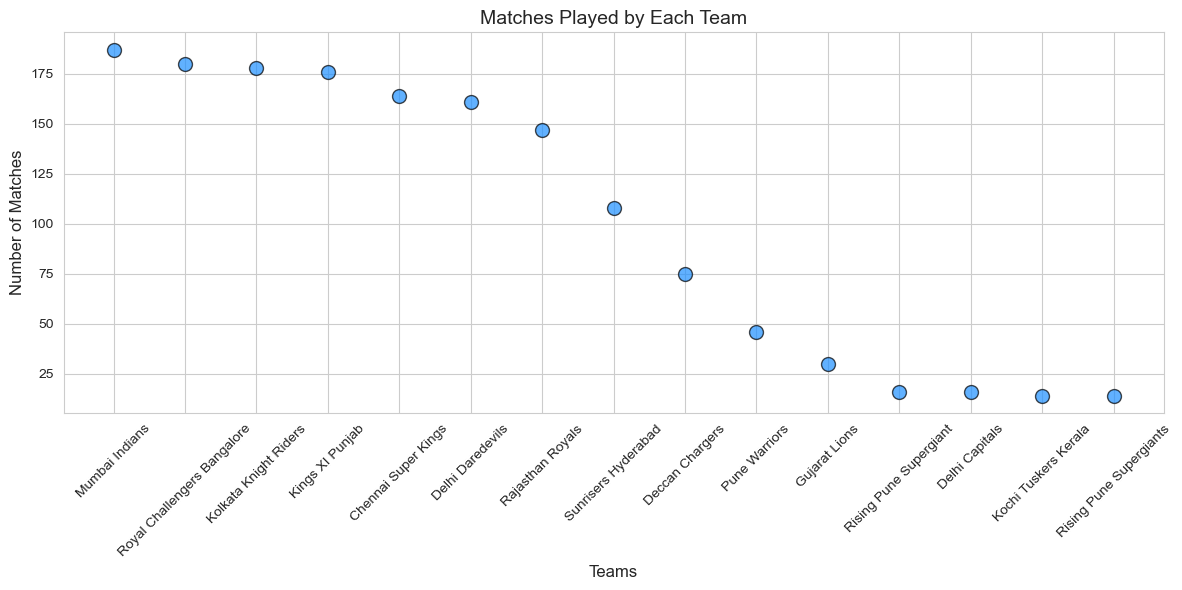

In [237]:
#Matches Played by Each Team
teams_played = pd.concat([data['team1'], data['team2']]).value_counts()
plt.figure(figsize=(12, 6))
plt.scatter(teams_played.index, teams_played.values, color='dodgerblue', s=100, alpha=0.7, edgecolor='black')
plt.title('Matches Played by Each Team', fontsize=14)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

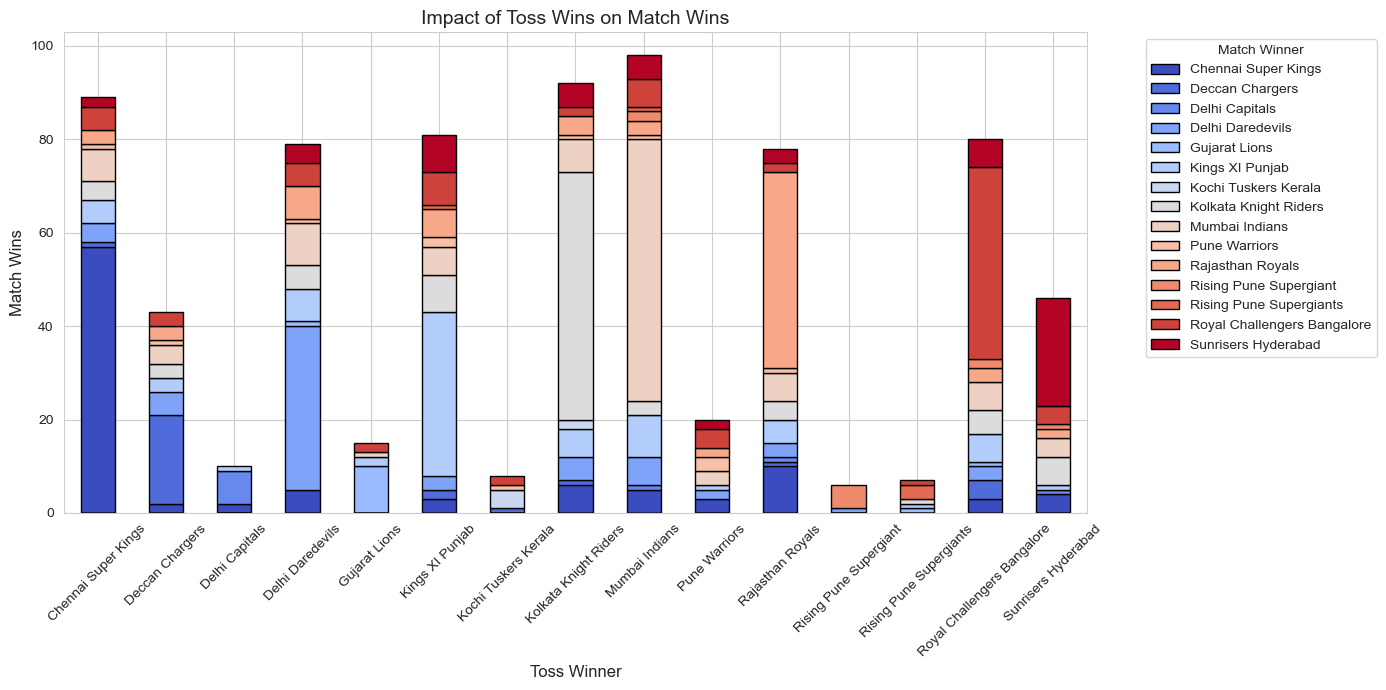

In [186]:
#Toss Win Impact on Match Win
toss_win_impact = data.groupby(['toss_winner', 'winner']).size().unstack(fill_value=0)
toss_win_impact.plot(kind='bar', stacked=True, figsize=(14, 7), cmap='coolwarm', edgecolor='black')
plt.title('Impact of Toss Wins on Match Wins', fontsize=14)
plt.xlabel('Toss Winner', fontsize=12)
plt.ylabel('Match Wins', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Match Winner', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/var/folders/pr/qppkd3sx6nqgx0zy38s6k2_80000gn/T/ipykernel_3473/61678423.py:3: SyntaxWarning: invalid escape sequence '\d'
  data['Season_Numeric'] = data['Season'].str.extract('(\d+)').astype(int)  # Convert Season to numeric values


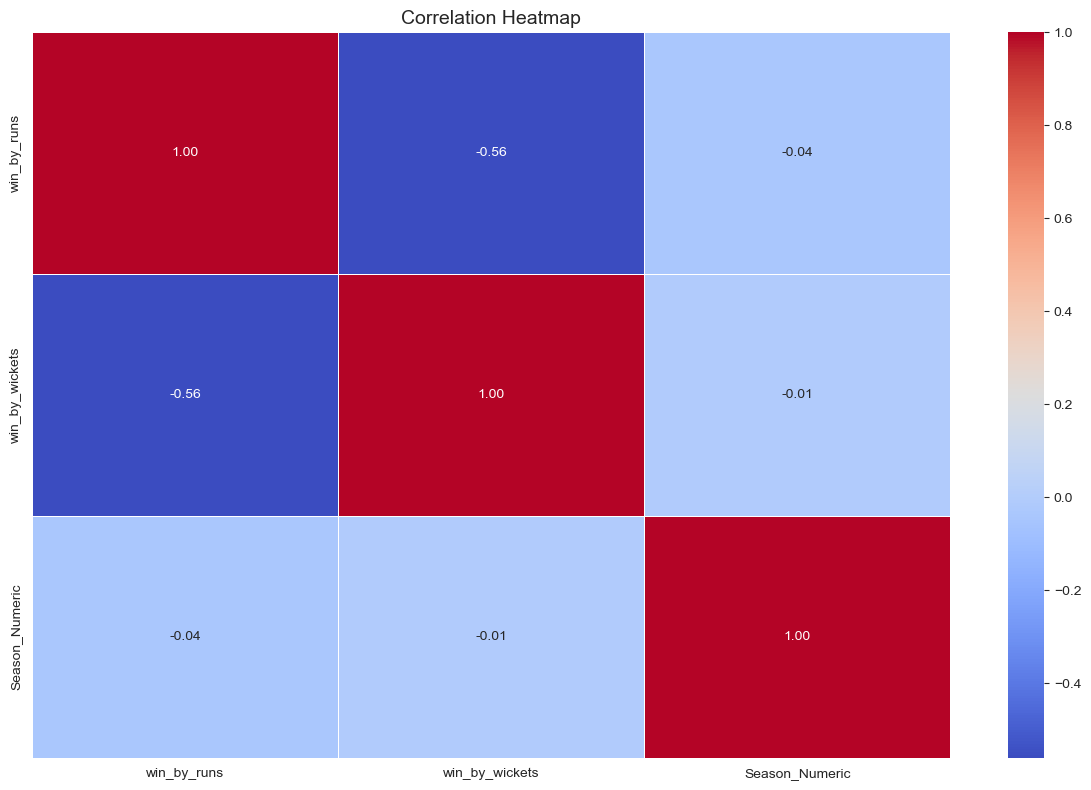

In [187]:
# 9. Correlation Heatmap
plt.figure(figsize=(12, 8))
data['Season_Numeric'] = data['Season'].str.extract('(\d+)').astype(int)  # Convert Season to numeric values
correlation_matrix = data[['win_by_runs', 'win_by_wickets', 'Season_Numeric']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

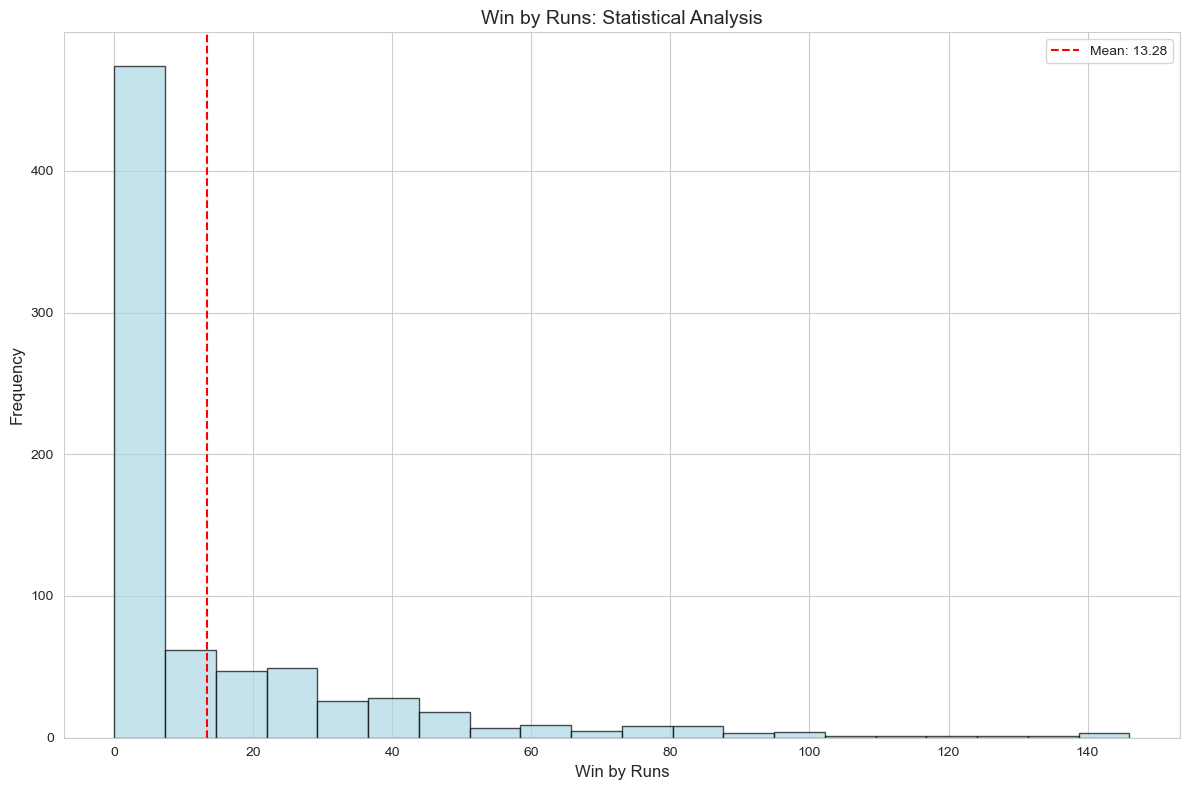

In [225]:
#Statistical Analysis with Mean
plt.figure(figsize=(12, 8))
win_by_runs = data['win_by_runs']
mean_val = win_by_runs.mean()

plt.hist(win_by_runs, bins=20, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')

plt.title('Win by Runs: Statistical Analysis', fontsize=14)
plt.xlabel('Win by Runs', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()